--- Starting trial: Optimizer=adam ---


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 37ms/step - accuracy: 0.7521 - loss: 0.6763 - val_accuracy: 0.8663 - val_loss: 0.3640
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 36ms/step - accuracy: 0.8842 - loss: 0.3215 - val_accuracy: 0.8770 - val_loss: 0.3354
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 67s 36ms/step - accuracy: 0.8998 - loss: 0.2701 - val_accuracy: 0.8987 - val_loss: 0.2798
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 92s 41ms/step - accuracy: 0.9120 - loss: 0.2395 - val_accuracy: 0.9022 - val_loss: 0.2695
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 38ms/step - accuracy: 0.9212 - loss: 0.2090 - val_accuracy: 0.9090 - val_loss: 0.2575
--- Starting trial: Optimizer=nadam ---
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.7712 - loss: 0.6297 - val_accuracy: 0.8750 - val_loss: 0.3481
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.8856 - loss: 0.3168 - val_accuracy: 0.8920 - val_loss: 0.3133
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83

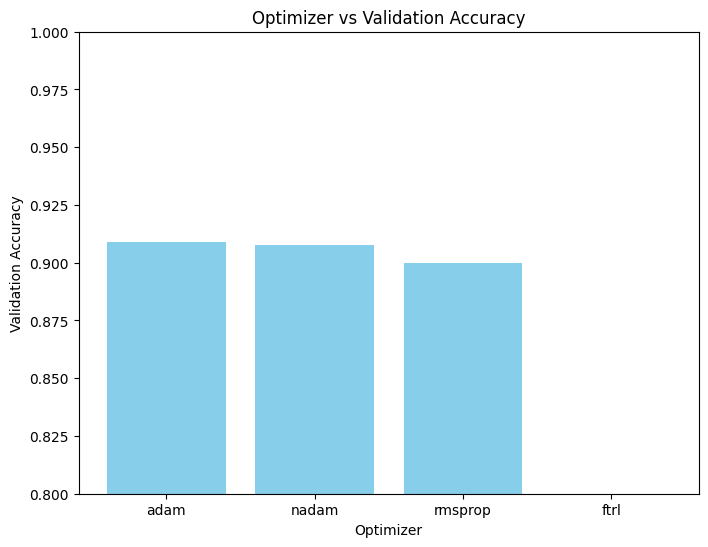

In [11]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorboard.plugins.hparams import api as hp
import matplotlib.pyplot as plt
import numpy as np

# Load the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Preprocess the data (normalize to [0,1] and reshape)
train_images = train_images / 255.0
test_images = test_images / 255.0
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

# Define the hparams for the optimizer exploration
HP_OPTIMIZER = hp.HParam('optimizer', hp.Discrete(['adam', 'nadam', 'rmsprop', 'ftrl']))

# Log directory for TensorBoard
LOG_DIR = "logs/hparam_tuning/"

# Function to build the model (same as Q1a model)
def build_model(hparams):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])

    model.compile(
        optimizer=hparams[HP_OPTIMIZER],
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Function to run and log the training
def run_experiment(hparams, session_num):
    model = build_model(hparams)
    history = model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

    accuracy = history.history['val_accuracy'][-1]  # Validation accuracy from last epoch
    return accuracy

# Run experiments for each optimizer
results = []
optimizers = ['adam', 'nadam', 'rmsprop', 'ftrl']
session_num = 0

for optimizer in optimizers:
    print(f"--- Starting trial: Optimizer={optimizer} ---")
    hparams = {HP_OPTIMIZER: optimizer}

    # Run the experiment with current optimizer
    accuracy = run_experiment(hparams, session_num)
    results.append((optimizer, accuracy))
    session_num += 1

# Plot results
optimizers, accuracies = zip(*results)
plt.figure(figsize=(8, 6))
plt.bar(optimizers, accuracies, color='skyblue')
plt.xlabel('Optimizer')
plt.ylabel('Validation Accuracy')
plt.title('Optimizer vs Validation Accuracy')
plt.ylim([0.8, 1.0])
plt.show()
